<a href="https://colab.research.google.com/github/rheni9/arcanum-app/blob/main/arcanum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Google Drive
This step mounts your Google Drive so that Colab can access your files.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load CSV file from Google Drive
Here we load a CSV file from the mounted Google Drive using pandas.

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/rdw/db_messages/chats_20251015.csv')
df.head()

,id,slug,chat_id,type,name,link,image,joined,is_active,is_member,is_public,notes
0,1,chat_0720b9,1.083207e+09,NaN,💭,https://t.me/gaychatru/1,https://s3.eu-central-003.backblazeb2.com/arca...,2018-08-26,True,False,True,26.08.2018 23:20
1,2,ga,1.032673e+09,NaN,/ga,https://t.me/gays_2ch,https://s3.eu-central-003.backblazeb2.com/arca...,2018-08-26,True,False,True,NaN
2,3,chat_bota_top,1.222760e+09,NaN,Чат Бота: TOP TG PROFIT,https://t.me/+UV7Ib3UuwvJiMjQy,https://s3.eu-central-003.backblazeb2.com/arca...,NaN,True,False,False,30.10.2019 17:18
3,4,bizhub24club_pyar_chat,1.498022e+09,NaN,BizHub24.Club Пиар чат 5️⃣,https://t.me/BizHub24Club_Piar5,https://s3.eu-central-003.backblazeb2.com/arca...,NaN,True,False,True,08.11.2019 06:32
4,5,mangit,1.072724e+09,NaN,🔜MANGIT🔚✴️,https://t.me/Mangit_n1,https://s3.eu-central-003.backblazeb2.com/arca...,2020-05-31,True,False,True,NaN


### Data cleansing and preparation
We shall tidy the dataset by converting IDs to integers, transforming date columns into datetime objects, and handling any missing values.

In [6]:
df["chat_id"] = df["chat_id"].astype("Int64")
df["joined"] = pd.to_datetime(df["joined"], errors="coerce")

In [7]:
df.head()

,id,slug,chat_id,type,name,link,image,joined,is_active,is_member,is_public,notes
0,1,chat_0720b9,1083207056,NaN,💭,https://t.me/gaychatru/1,https://s3.eu-central-003.backblazeb2.com/arca...,2018-08-26,True,False,True,26.08.2018 23:20
1,2,ga,1032673352,NaN,/ga,https://t.me/gays_2ch,https://s3.eu-central-003.backblazeb2.com/arca...,2018-08-26,True,False,True,NaN
2,3,chat_bota_top,1222759565,NaN,Чат Бота: TOP TG PROFIT,https://t.me/+UV7Ib3UuwvJiMjQy,https://s3.eu-central-003.backblazeb2.com/arca...,NaT,True,False,False,30.10.2019 17:18
3,4,bizhub24club_pyar_chat,1498021540,NaN,BizHub24.Club Пиар чат 5️⃣,https://t.me/BizHub24Club_Piar5,https://s3.eu-central-003.backblazeb2.com/arca...,NaT,True,False,True,08.11.2019 06:32
4,5,mangit,1072723922,NaN,🔜MANGIT🔚✴️,https://t.me/Mangit_n1,https://s3.eu-central-003.backblazeb2.com/arca...,2020-05-31,True,False,True,NaN


### Checking for missing values
We inspect the dataset to identify how many entries are absent in each column.

In [8]:
print(df.isna().sum())

id             0
slug           0
chat_id       35
type         142
name           0
link          62
image         34
joined       104
is_active      0
is_member      0
is_public      0
notes         68
dtype: int64


### Basic statistical overview
Let us examine the counts of active, public, and membership statuses within the dataset.

In [12]:
summary = pd.DataFrame({
    "Active": df["is_active"].value_counts(),
    "Public": df["is_public"].value_counts(),
    "Member": df["is_member"].value_counts()
}).reindex([True, False])
print(summary)

       Active  Public  Member
True       80      43      15
False      62      99     127


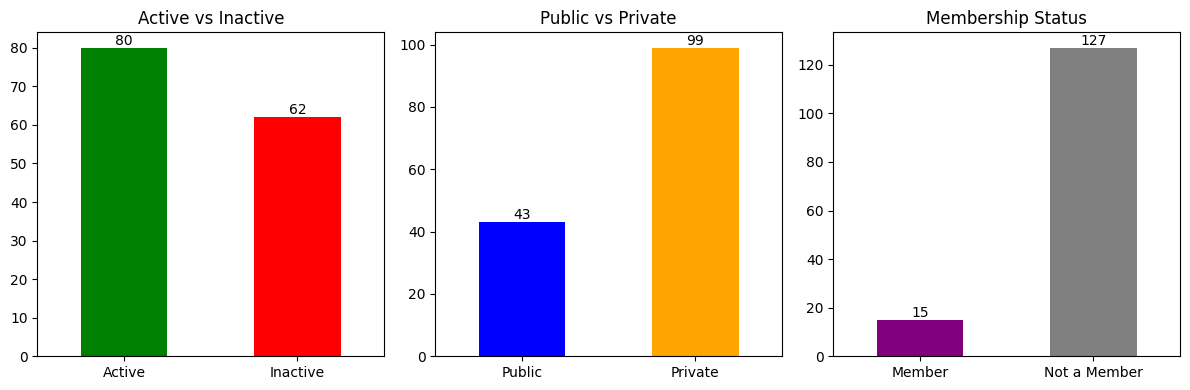

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Active vs Inactive
plot_active = df["is_active"].value_counts().reindex([True, False]).plot(
    kind="bar",
    ax=axes[0],
    color=["green", "red"],
    title="Active vs Inactive"
)
axes[0].set_xticklabels(["Active", "Inactive"], rotation=0)
axes[0].set_xlabel("")
axes[0].bar_label(plot_active.containers[0])

# Public vs Private
plot_public = df["is_public"].value_counts().reindex([True, False]).plot(
    kind="bar",
    ax=axes[1],
    color=["blue", "orange"],
    title="Public vs Private"
)
axes[1].set_xticklabels(["Public", "Private"], rotation=0)
axes[1].set_xlabel("")
axes[1].bar_label(plot_public.containers[0])

# Membership status
plot_member = df["is_member"].value_counts().reindex([True, False]).plot(
    kind="bar",
    ax=axes[2],
    color=["purple", "grey"],
    title="Membership Status"
)
axes[2].set_xticklabels(["Member", "Not a Member"], rotation=0)
axes[2].set_xlabel("")
axes[2].bar_label(plot_member.containers[0])

plt.tight_layout()
plt.show()

In [19]:
today = pd.Timestamp.today()

# Спочатку ставимо NaN для всіх
df["membership_days"] = pd.NA

# Для тих, де є дата і користувач є членом чату — рахуємо
mask = df["is_member"] & df["joined"].notna()
df.loc[mask, "membership_days"] = (today - df.loc[mask, "joined"]).dt.days


In [26]:
memberships = df[df["is_member"] & df["joined"].notna()]
memberships = memberships.sort_values("membership_days", ascending=False)
memberships[["name", "joined", "membership_days"]]

,name,joined,membership_days
8,G Київ та область,2025-08-15,63
44,Ukrainian Bears,2025-08-15,63
57,🇺🇦 BBS UA | Гей знайомства,2025-08-15,63
66,Нудисти Києва,2025-08-15,63
88,Експрес G Київ та область,2025-08-15,63
103,DRYG 🇺🇦,2025-08-15,63
131,KYIV DATING,2025-08-15,63
133,Blueberry group 🫐,2025-08-15,63
134,BB 🔞,2025-08-15,63
135,G UA,2025-08-15,63
